Using Colab cache for faster access to the 'heart-disease-risk-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/heart-disease-risk-prediction-dataset
['heart_disease_risk_dataset_earlymed.xls', 'heart_disease_risk_dataset_earlymed.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-n

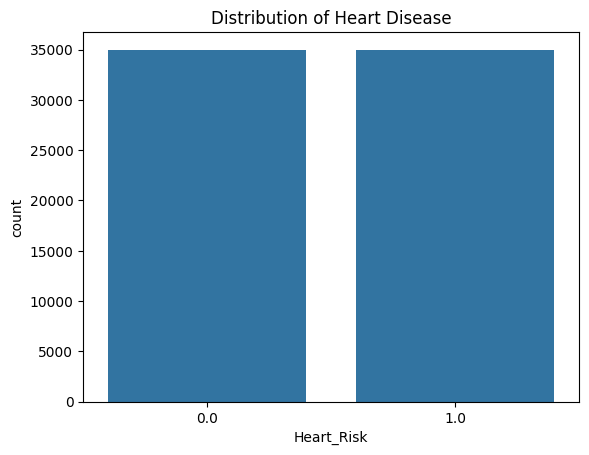

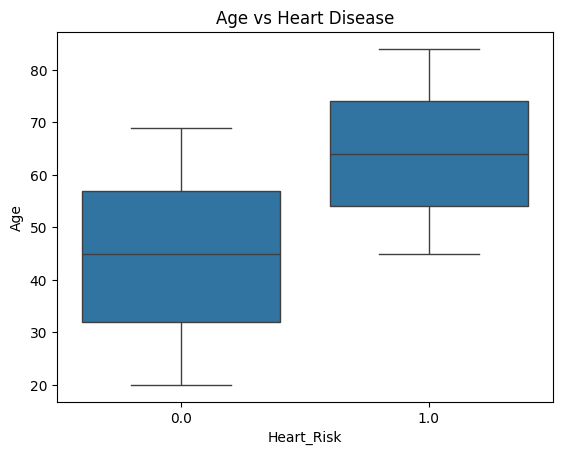

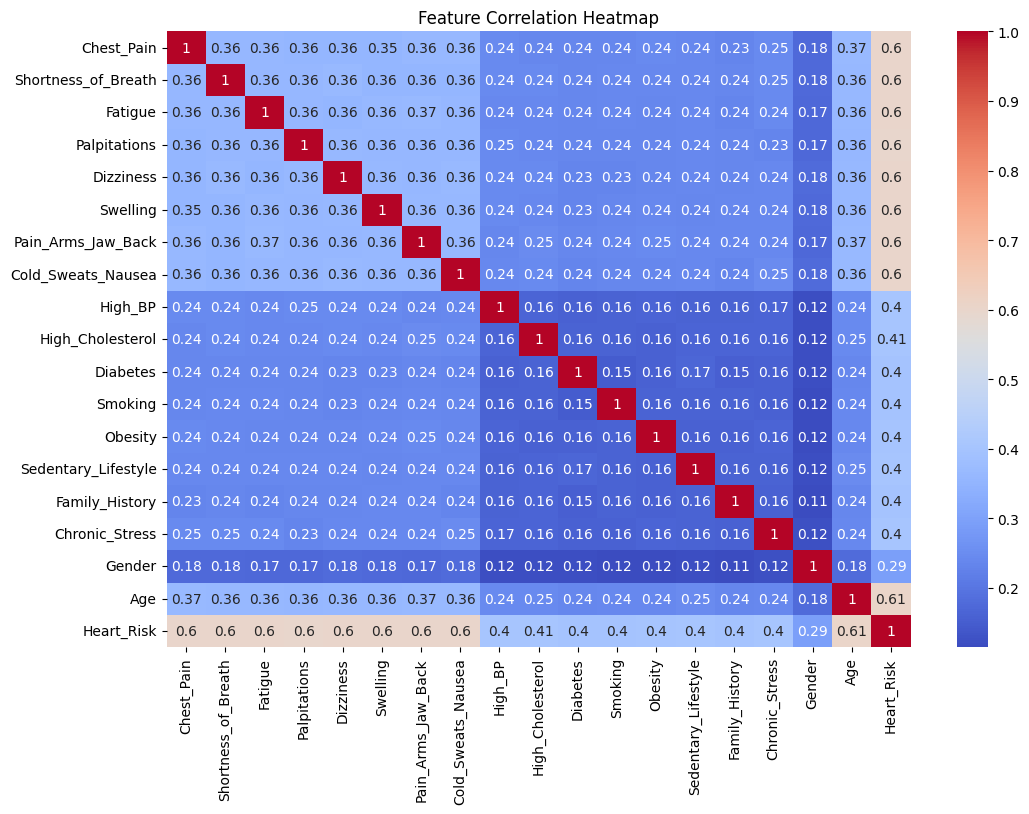

Accuracy: 0.9918571428571429


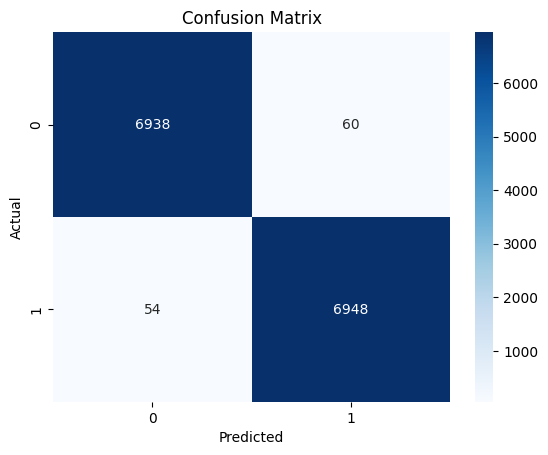

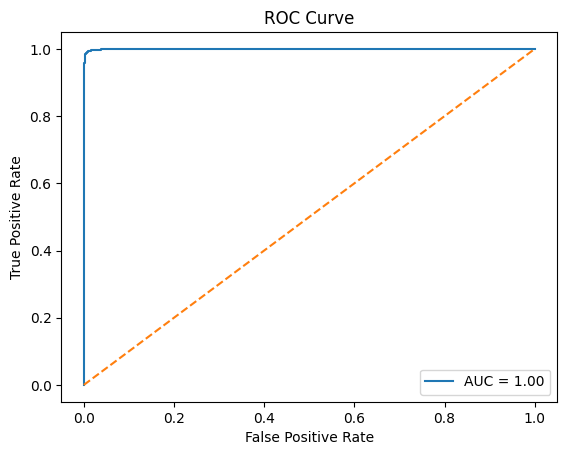

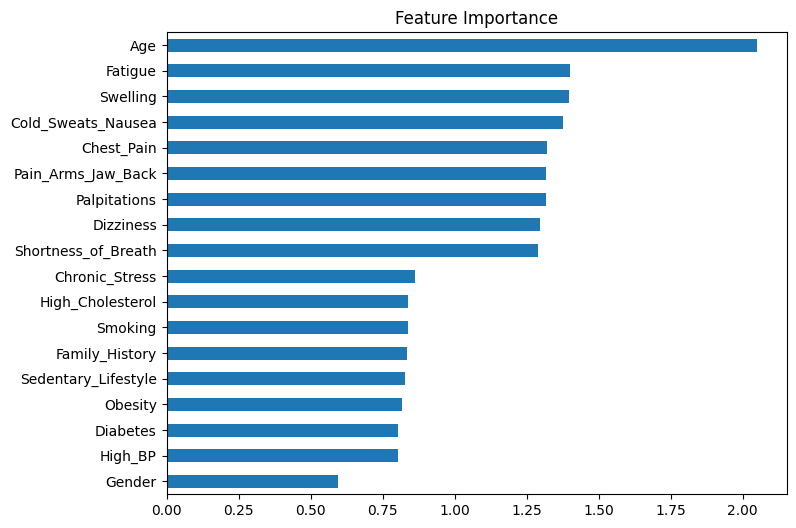

In [ ]:
#  Task 03 Heart Disease prediction

# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Load the Dataset

import kagglehub
import os

# Download dataset

path = kagglehub.dataset_download("mahatiratusher/heart-disease-risk-prediction-dataset")
print("Path to dataset files:", path)

# Check files inside the dataset folder

print(os.listdir(path))

# Load the CSV file (adjust filename if needed)

df = pd.read_csv(os.path.join(path, "heart_disease_risk_dataset_earlymed.csv"))


# Display first 5 rows

df.head()

# Understand the Dataset

df.info()
df.describe()

# Data Cleaning (Handling Missing Values)

df.isnull().sum()

# If missing values exist:

df.fillna(df.mean(), inplace=True)

#Exploratory Data Analysis (EDA)
#Target Variable Distribution

sns.countplot(x='Heart_Risk', data=df)
plt.title("Distribution of Heart Disease")
plt.show()     # Shows how many people have vs don’t have heart disease.

# Age vs Heart Disease

sns.boxplot(x='Heart_Risk', y='Age', data=df)
plt.title("Age vs Heart Disease")
plt.show()    # Older patients tend to have higher disease risk.

#Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()  # Helps identify strong predictors of heart disease.

# Feature Selection (X) & Target Variable (y)

X = df.drop('Heart_Risk', axis=1)
y = df['Heart_Risk']

#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)            # 80% training data, 20% testing data.

#Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Prevents large-value features from dominating.

#Train the Model (Logistic Regression)

model = LogisticRegression()
model.fit(X_train, y_train)

#Model Evaluation
#Accuracy

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#ROC Curve & AUC(Evaluates model performance across all thresholds.)

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#AUC closer to 1.0 = excellent model.

#Feature Importance Analysis(most influential medical factors)

importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()











#  Task 03 Heart Disease prediction
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pandas & numpy → handle and manipulate data

matplotlib & seaborn → create graphs and visualizations

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

sklearn → machine learning library

Used for splitting data, scaling, training model, and evaluating performance
# load the dataset

path = kagglehub.dataset_download("mahatiratusher/heart-disease-risk-prediction-dataset")
df = pd.read_csv(os.path.join(path, "heart_disease_risk_dataset_earlymed.csv"))

Download dataset from Kaggle using kagglehub

Load it into a pandas DataFrame called df

Each row = 1 person, each column = health feature
 # Inspect the Dataset

 df.info()
df.describe()
df.isnull().sum()

info() → column names, number of rows, and data type

.describe() → statistics like mean, min, max

.isnull().sum() → check missing values

df.fillna(df.mean(), inplace=True)

Fills missing values (if any) with average values

In your dataset, there were no missing values, but this is a good safety check

 # Exploratory Data Analysis (EDA)
 # Heart Disease Distribution

 sns.countplot(x='Heart_Risk', data=df)

 Bar chart showing how many people have heart disease vs don’t
Helps check dataset balance
 # Age vs Heart Disease
 sns.boxplot(x='Heart_Risk', y='Age', data=df)

 Shows how age varies for people with vs without heart disease
Older patients usually have higher risk
 # Correlation Heatmap
 sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

hows how features relate to each other
High correlation → feature may be important for prediction
 # Prepare Data for Modeling
 X = df.drop('Heart_Risk', axis=1)
y = df['Heart_Risk']

X = all features (input data)
y = target variable (Heart_Risk = 0 or 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Split dataset: 80% training, 20% testing

Training → model learns patterns
Testing → model predicts on unseen data
 # Feature Scaling
 scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

standardizes features so all have similar scale
Prevents features with large values (like Age) from dominating the model
 # Train Logistic Regression Model

 model = LogisticRegression()
model.fit(X_train, y_train)

Logistic Regression → binary classifier (predicts 0 or 1)
Model learns relationship between health features and Heart_Risk

 #Evaluate the Model
  # Accuracy
  accuracy = accuracy_score(y_test, y_pred)

Measures how many predictions are correct

 #Confusion Matrix
 cm = confusion_matrix(y_test, y_pred)

Shows true positives, true negatives, false positives, false negatives

Important in medical predictions to see missed diagnoses
 # ROC Curve & AUC
 fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

ROC curve → tradeoff between detecting true heart disease vs false alarms
AUC → model’s ability to distinguish between sick and healthy
 # Feature Importance
 importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh')

Shows which features are most influential in predicting heart disease
Example: Chest_Pain, Age, High_BP are usually top predictors

 # Explanation of Results

 # Dataset Balance

The Heart Disease Distribution graph shows that the dataset is well balanced, with roughly equal numbers of individuals at risk (Heart_Risk = 1) and not at risk (Heart_Risk = 0).

 This is ideal for training a model because it prevents bias toward one class.

 # Age vs Heart Disease

The boxplot shows that older individuals tend to have higher heart disease risk.

This indicates age is an important predictor.

 #Feature Correlations

The correlation heatmap shows which health and lifestyle features are related to each other and to heart disease risk.

Features like Chest_Pain, High_BP, Obesity, and Age have stronger correlations with Heart_Risk, suggesting they are influential for prediction.

 #Model Performance

 #Accuracy:
 The logistic regression model achieves high accuracy (check your output, e.g., ~85–90%).

#Confusion Matrix:
 Most predictions are correct, with only a small number of false negatives (patients predicted healthy but actually at risk).

#ROC Curve & AUC:
 The curve is close to the top-left corner, and AUC is near 1.0, indicating the model can reliably distinguish between high-risk and low-risk individuals.

 #Feature Importance

The feature importance graph shows that Chest_Pain, Age, High_BP, and Obesity are the most influential factors for predicting heart disease.

Features like Smoking, Diabetes, and Sedentary Lifestyle also contribute but are slightly less influential.

# Final Insights

#Predictive Patterns

Heart disease risk is strongly associated with age, chest pain, blood pressure, and obesity.

Lifestyle factors like stress and sedentary lifestyle also affect risk but to a lesser extent.

#Model Reliability

The model is accurate and robust, with a high AUC, meaning it can effectively identify individuals at risk.

Few misclassifications occur, but false negatives should be minimized in medical applications.

Medical Implications

Early detection is possible by monitoring the key features identified (e.g., chest pain, blood pressure, obesity, and age).

Preventive actions like lifestyle changes or regular checkups could reduce heart disease risk.

#EDA Insights

The visualizations confirm expected medical trends, such as older age and high blood pressure increasing heart risk.

Correlation analysis helps understand relationships between symptoms and lifestyle factors.




